Pair programming Visualización

Ejercicios visualización

En este pair programming usaremos el csv que generamos en el pair programming de ayer, el de la gestión de nulos.
 A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización(podréis usar tanto Seaborn como Matplotlib).

----------------------------------------------------------------------------------------------------------------------
¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? 

¿Hay algún patrón evidente?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None) 

In [67]:
df_pair = pd.read_csv('world_data_full_apply_nulos.csv', index_col=0)

In [4]:
df_pair.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

In [3]:
df_pair.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


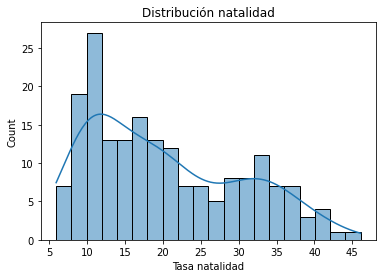

In [6]:
sns.histplot(x='birth_rate', data= df_pair, bins=20, kde=True)
plt.xlabel('Tasa natalidad')
plt.title('Distribución natalidad');

<AxesSubplot:xlabel='birth_rate'>

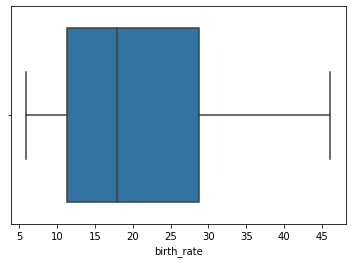

In [7]:
sns.boxplot(data= df_pair, x="birth_rate")

¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? 

Proporciona una breve descripción de los patrones que observes.

Text(0.5, 1.0, 'Mortalidad Infantil Vs Esperanza de vida')

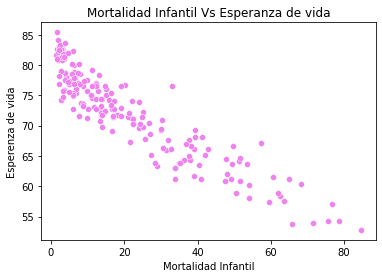

In [8]:
sns.scatterplot(x='infant_mortality', y= 'life_expectancy', data= df_pair, color= 'violet')

plt.xlabel('Mortalidad Infantil')
plt.ylabel('Esperenza de vida')
plt.title('Mortalidad Infantil Vs Esperanza de vida')

<AxesSubplot:xlabel='infant_mortality', ylabel='life_expectancy'>

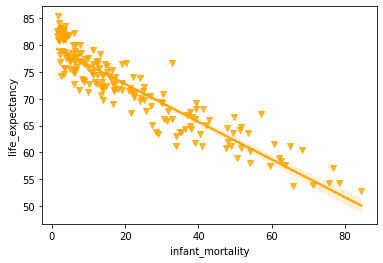

In [9]:
sns.regplot( x='infant_mortality', y= 'life_expectancy', data= df_pair, color= 'orange', marker= 'v')

¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? 

Proporciona el porcentaje de países en ese continente.

In [39]:
df_country= df_pair.groupby('continent')['country'].count().reset_index()
df_country

,continent,country
0,Africa,53
1,Asia,45
2,Central America,20
3,Europe,47
4,North America,2
5,Oceania,14
6,South America,13


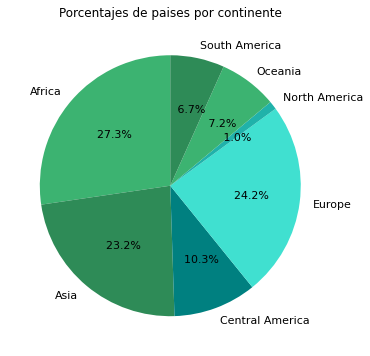

In [14]:
colores = [ "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]
plt.pie( df_country['country'], labels=df_country['continent'],
        data= df_country,
        autopct=  '%6.1f%%', 
        colors = colores, 
        textprops={'fontsize': 11}, 
        startangle=90)

plt.title('Porcentajes de paises por continente')
plt.gcf().set_size_inches(8,6)
plt.show()

¿Cuál es la mediana de la esperanza de vida en Europa? 

Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos. s

In [68]:
esperanza_europa= df_pair['continent'] == 'Europa'

In [69]:
df_europa = df_pair[esperanza_europa]
df_europa.head(5)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent


¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? 

Usa un subplot. 

Describe cualquier patrón que encuentres.

In [41]:
#'birth_rate', 'infant_mortality', 'life_expectancy','density,'urban_population'
# Seguro que se puede hacer con un bucle 'for'....

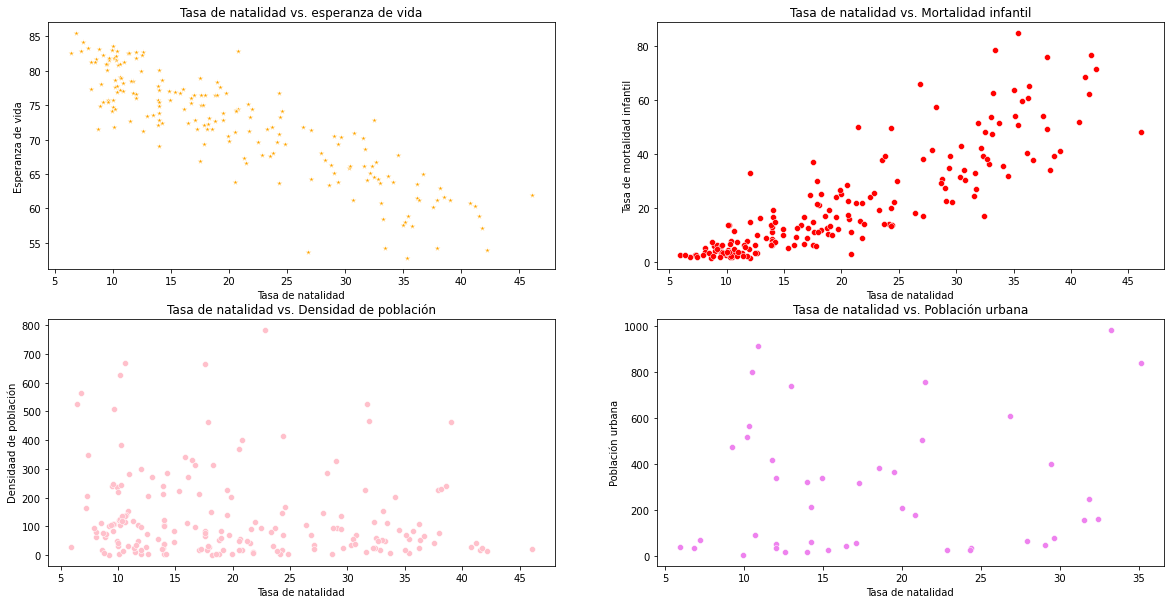

In [43]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

sns.scatterplot (x = 'birth_rate',
                y = 'life_expectancy',
                data= df_pair,
                marker = '*',
                color= 'orange',
                ax = axes[0][0])

axes[0][0].set_title('Tasa de natalidad vs. Esperanza de vida')
axes[0][0].set_xlabel('Tasa de natalidad')
axes[0][0].set_ylabel('Esperanza de vida')

sns.scatterplot( x= 'birth_rate',
                 y = 'infant_mortality',
                  data= df_pair,
                  markers= 'v',
                  color = 'red',
                  ax= axes[0][1])

axes[0][1].set_title('Tasa de natalidad vs. Mortalidad infantil')
axes[0][1].set_xlabel('Tasa de natalidad')
axes[0][1].set_ylabel('Tasa de mortalidad infantil')

sns.scatterplot( x= 'birth_rate',
                 y = 'density',
                  data= df_pair,
                  markers= 'v',
                  color = 'pink',
                  ax= axes[1][0])

axes[1][0].set_title('Tasa de natalidad vs. Densidad de población')
axes[1][0].set_xlabel('Tasa de natalidad')
axes[1][0].set_ylabel('Densidaad de población')

sns.scatterplot( x= 'birth_rate',
                 y = 'urban_population',
                  data= df_pair,
                  markers= 'v',
                  color = 'violet',
                  ax= axes[1][1])

axes[1][1].set_title('Tasa de natalidad vs. Población urbana')
axes[1][1].set_xlabel('Tasa de natalidad')
axes[1][1].set_ylabel('Población urbana');

¿Cuáles son los 10 países con la mayor área forestal?

In [44]:
df_pair.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

In [48]:
df_forestal= df_pair[['country', 'forested_area']].sort_values(by='forested_area', ascending = False).head(10)
df_forestal

,country,forested_area
167,Suriname,98.3
111,Federated States of Micronesia,91.9
61,Gabon,90.0
154,Seychelles,88.4
132,Palau,87.6
71,Guyana,83.9
92,Laos,82.1
159,Solomon Islands,77.9
135,Papua New Guinea,74.1
59,Finland,73.1


<AxesSubplot:xlabel='forested_area', ylabel='country'>

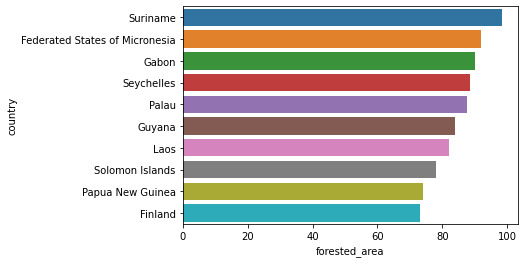

In [49]:
sns.barplot(data = df_forestal, 
            x="forested_area", 
            y="country")

¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

In [51]:
df_continent_nat = df_pair.groupby('continent')['birth_rate'].mean().reset_index()
df_continent_nat

,continent,birth_rate
0,Africa,31.906154
1,Asia,18.811136
2,Central America,16.689000
3,Europe,9.955111
4,North America,10.850000
5,Oceania,23.115833
6,South America,17.033077


In [ ]:
# barplot? pieplot?

<AxesSubplot:xlabel='birth_rate', ylabel='continent'>

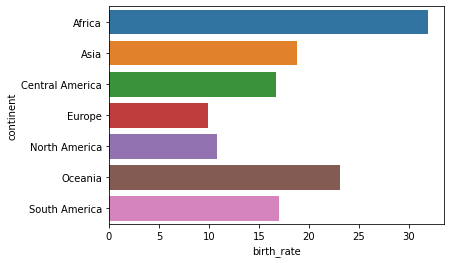

In [53]:
sns.barplot(data =df_continent_nat, 
            x="birth_rate", 
            y="continent")

¿Cómo se relacionan el CPI y el precio de la gasolina? 

Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. 

Ajusta los valores del CPI entre 100 y 300.

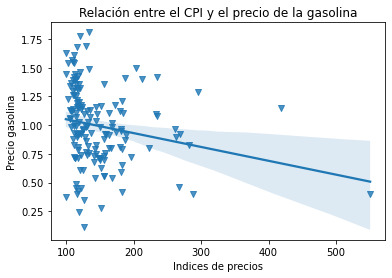

In [62]:
sns.regplot(x = "cpi", 
            y = "gasoline_price", 
            data = df_pair, 
            marker = "v")



plt.xlabel("Indices de precios")
plt.ylabel("Precio gasolina")
plt.xlim = ([100,300])
# ponemos título a la gráfica
plt.title("Relación entre el CPI y el precio de la gasolina");

¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? 

Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

In [70]:
df_ocean= df_pair['continent']== 'oceania'

In [71]:
df_oceania= df_pair[df_ocean]

In [72]:
df_oceania.groupby('official_language')['population'].sum().reset_index()

,official_language,population


<AxesSubplot:xlabel='life_expectancy', ylabel='official_language'>

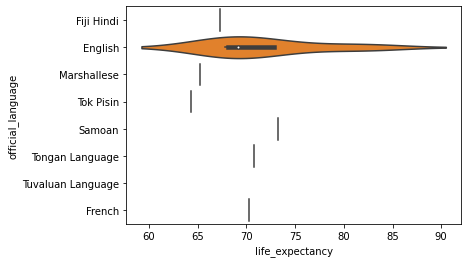

In [74]:
df_oceania=df_pair[df_pair["continent"]=="Oceania"]
sns.violinplot(x="life_expectancy",y='official_language',data=df_oceania)